In [1]:
 #import libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#data preprocessing

In [4]:
#training image processing

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
x_train = train_datagen.flow_from_directory(
        'training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 4317 images belonging to 5 classes.


In [14]:
#test image processing
#test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 4441 images belonging to 5 classes.


In [16]:
#3.building model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

model = Sequential()

In [18]:
#4.building convolutional model

In [19]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #multiple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

#5.Compile The Model

In [20]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

135

In [21]:
#model.fit(x_train, epochs = 15, validation_data = x_test, steps_per_epoch = len(x_train), validation_steps = len(x_test))

model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
135/135 [==============================] - 22s 161ms/step - loss: 1.3529 - accuracy: 0.4570
Epoch 2/15
135/135 [==============================] - 20s 150ms/step - loss: 1.0379 - accuracy: 0.5942
Epoch 3/15
135/135 [==============================] - 20s 148ms/step - loss: 0.9353 - accuracy: 0.6361
Epoch 4/15
135/135 [==============================] - 20s 149ms/step - loss: 0.8621 - accuracy: 0.6632
Epoch 5/15
135/135 [==============================] - 20s 151ms/step - loss: 0.8012 - accuracy: 0.6956
Epoch 6/15
135/135 [==============================] - 20s 150ms/step - loss: 0.7771 - accuracy: 0.7060
Epoch 7/15
135/135 [==============================] - 19s 144ms/step - loss: 0.7320 - accuracy: 0.7227
Epoch 8/15
135/135 [==============================] - 20s 146ms/step - loss: 0.6749 - accuracy: 0.7454
Epoch 9/15
135/135 [==============================] - 19s 143ms/step - loss: 0.6382 - accuracy: 0.7647
Epoch 10/15
135/135 [==============================] - 20s 149ms/step - l

In [22]:
#6. Fit The Model

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               9225900   
                                                                 
 dense_4 (Dense)             (None, 150)               45150     
                                                                 
 dense_5 (Dense)             (None, 5)                 755       
                                                      

In [24]:
#7. Save The Model

In [25]:
model.save("flowers.h5")

In [26]:
#8. Test The Model

1/1 [==============================] - 0s 101ms/step
Input Image is



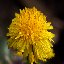

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model(r"C:\Users\Chelsia stella\OneDrive\Desktop\Flower_classification\flowers.h5")
img = image.load_img(r"C:\Users\Chelsia stella\OneDrive\Desktop\Flower_classification\Prediction\dandelion.jpg", target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
print("Input Image is\n")
img

In [36]:
print("Classification of Flower is:",labels[np.argmax(pred)])

Classification of Flower is: sunflowers
